# HART Survey Data Exploratory Data Analysis Example

*Introduction to the file: this is a dataset produced by an onboard bus survey intended to suppor the study of the rail project's impact on transit. There is an accompanying study, but I did not review it prior to this analysis. *

Going into this analysis, I don't have any particular interest, just trying to assess the value of the dataset to any of my related interests. This could include characterizing people who ride the bus, understanding commute times, understanding which routes are most important, understanding what might make more people ride the bus and move away from driving personal vehicles for transportation

In [2]:
library(ggplot2)

In [4]:
library(tidyverse)

file.info("_bentrevino_files/HART_survey_data.csv")

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
_bentrevino_files/HART_survey_data.csv,25421948,FALSE,644,2018-02-03 12:28:35,2018-02-03 12:28:37,2018-02-03 12:28:42,501,20,bentrevino,staff


## Step 1: Load the file

In [23]:
tb = read.csv("_bentrevino_files/HART_survey_data.csv")

*It's worth noting that this file is 25MB which suggests a large file that might be slow to work with. Will probably want to get it down to be manageable for both performance and management*

## Step 2: Get a sense for Variables

In [24]:
glimpse(tb)

Observations: 26,246
Variables: 157


ERROR: Error in nchar(x): invalid multibyte string, element 46


We found out there are **26K rows ** and **157 variables/columns**
looks like there's an error in the load somewhere. Probably in the formatting of one of the columns. May not be an issue if we filter down.

157 is a lot of variables to work with. Will see what I can get from summary and try to categorize or isolate interesting variables

In [25]:
summary(tb)

  ETC_ID_FINAL       ETC.ID             DATE           ROUTE      
 Min.   :    1   Min.   :   1   2012-04-26:  978   1      : 2033  
 1st Qu.: 6562   1st Qu.:1393   2012-05-14:  862   2      : 1952  
 Median :13124   Median :2144   2012-05-03:  848   A      : 1562  
 Mean   :13124   Mean   :3516   2012-04-24:  808   3      : 1511  
 3rd Qu.:19686   3rd Qu.:5553   2012-04-16:  789   40     : 1288  
 Max.   :26251   Max.   :9999   2012-05-08:  755   13     : 1152  
                                (Other)   :21206   (Other):16748  
 Direction_Code Direction_Text VISITOR.2.HAWAII_Code VISITOR.2.HAWAII_Text
 E:13468        East:13468     Min.   :1.000         No :24691            
 W:12778        West:12778     1st Qu.:2.000         Yes: 1555            
                               Median :2.000                              
                               Mean   :1.941                              
                               3rd Qu.:2.000                              
              

## Step 3: Notes from looking through the summary
- First ID column seems to just be a line number, and I can't make sense of ETC.ID
- survey was conducted on several different dates... looks like primarily in 2012. 750-100 surveys per day on the top days shown. If that holds up looks like 30-60 days of surveys. ** Would like to follow up with complete look at dates and how many surveys done on each date **
- Routes have up to 2000 surveys. Not sure what routes are used, but would be interested to see some information about the surveys per route. **Look at route data and see if can plot route data... maybe against route general ridership**
- Direction is a factor ** This would be a logical thing to split on to compare **
- Visitor to Hawaii looks interesting, but they make up a relatively small proportion (less than 10%) of bus ridership. Not sure how indicative they would be. **But could be interesting to compare the incidence of local vs visitor traffic as a proportion of surveys?**
- Then there's generally a lot of visitor detail. Not sure the value for the 10% of riders surveyed. But perhaps if we were looking at visitor specific questions, this could be interesting.
- There's a home city and home city geocoded column. Would probably be more interested in the **zip codes for mapping**. However, in the meantime a **bar chart for home places could be interesting if there weren't too many entries**
- There's a home_lat and home_lon. Not sure how this is calculated... **could map to find out what's in there**. Or **could look at documentation on the data set**
- The Origin Type Data looks strange. 
- Origin name looks more useful. Home and work give rise to questions about **Time of day that surveys took place...** but half are starting from home which seems to make sense in the overall balance of things
- There is an origin address. These could be bus stops. ** One way to test the origin concept is to see if there are groupings of lats and lons or a lot of single origins **
- **Mode looks like it could be kind of interesting**, but seems like all rows include walking. So it's really about other modes on top of walking
- Could be interesting to compare destination to origin... homes don't line up exactly, so it would be interesting to see what that means, or what it suggests about the timing. ** That would be an interesting future question about transit use that this may be able to help define -- but only if questions about how the survey was conducted are answered **
- Origin to Destination locations could be used to calculate ** Distance or path ** between the LAT/LON combinations
- There are some general parameters for time periods. ** This is a key to plot**
- There are also boardings and these might be different from the origin and destination locations. So could ** Map the differences in the origins and boardings ** this could get interesting to see what the catchment around a given station looks like
- There is also transfer information. Looks like maybe 20% were transfer. So there could be a semi interesting transfer study in there... Would need to compare to the main data set and the overall transit ridership
- questions about boarding at ala moana specifically
- here's an interesting one ** If No transit was available, how would you go **
- How **long riding the bus, Pass Status, and fare discounts** all interesting as well. Could be subject of different direction of study.
- Employment status (working currently, full time part time, etc) and household size could be used to **characterize bus riders**
- Student status is another one
- Drivers License status could be an interesting ID question and equity issue. Preliminary, only about half have drivers licenses. ** Voter registration? **
- Language and ethnicity would also be interesting.
- Purpose of Trip seems like it could correlate to other fields. **Might be worth looking into to understand how to use the information and if it's accurate**

Chart Reference:
www.stat.wisc.edu/~larget/stat302/chap2.pdf

## Date Bar Chart

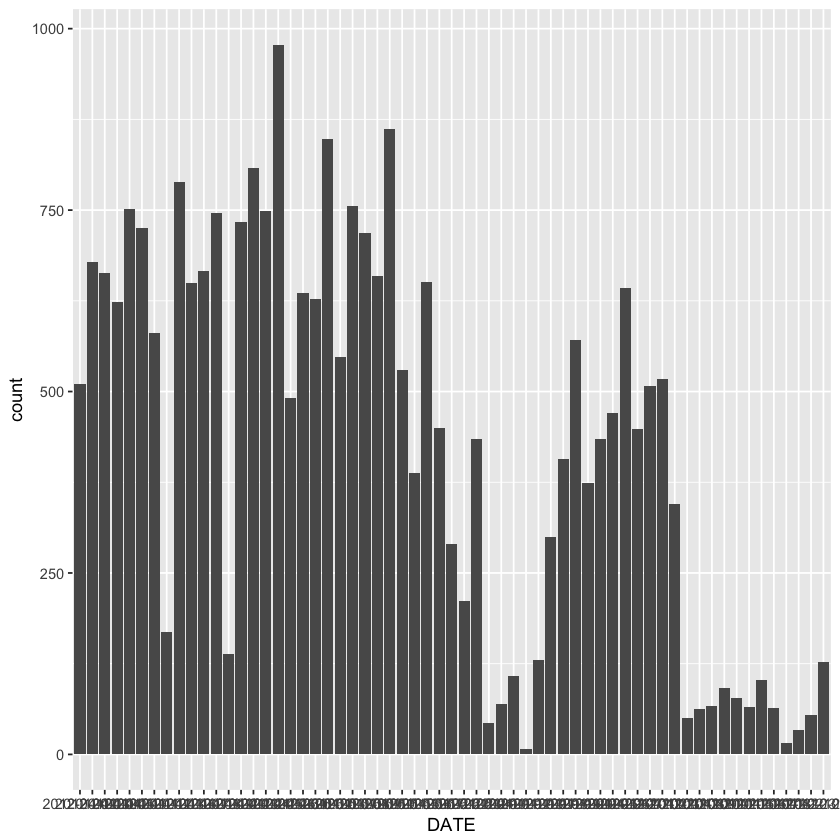

In [13]:
ggplot(tb, aes(x=DATE)) + geom_bar()

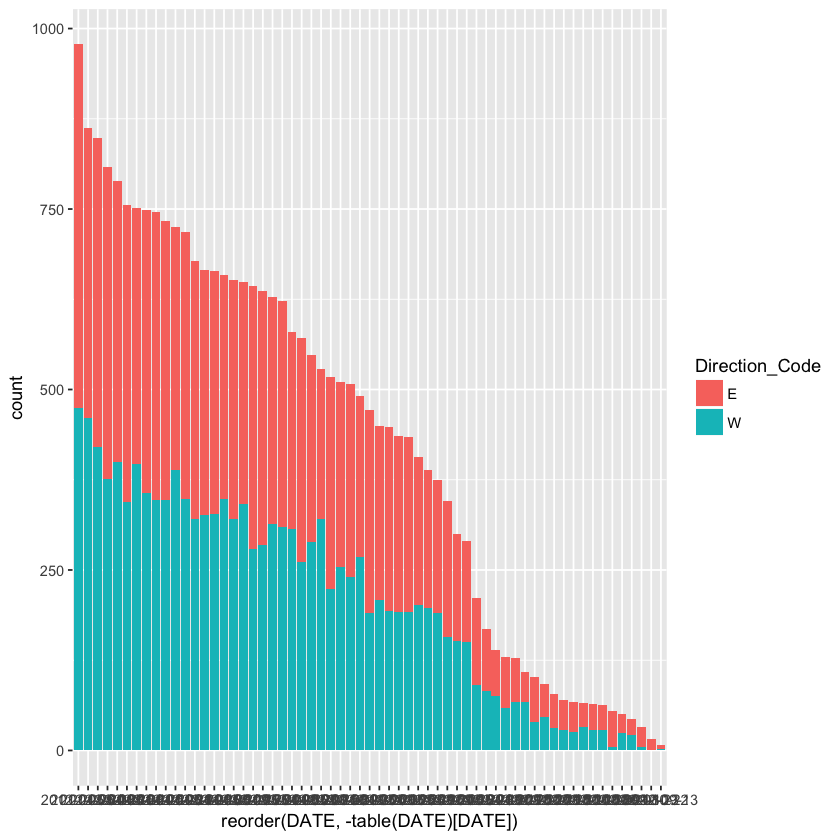

In [25]:
ggplot(tb, aes(x = reorder(DATE, -table(DATE)[DATE]), fill=Direction_Code)) + geom_bar()

## Route Bar Chart

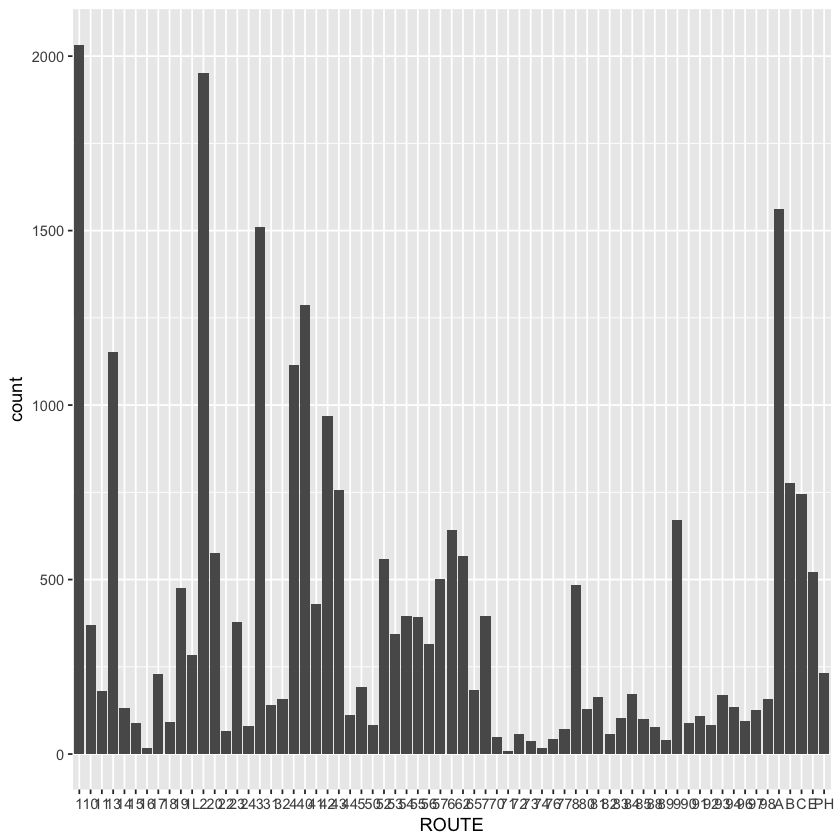

In [14]:
ggplot(tb, aes(x=ROUTE)) + geom_bar()

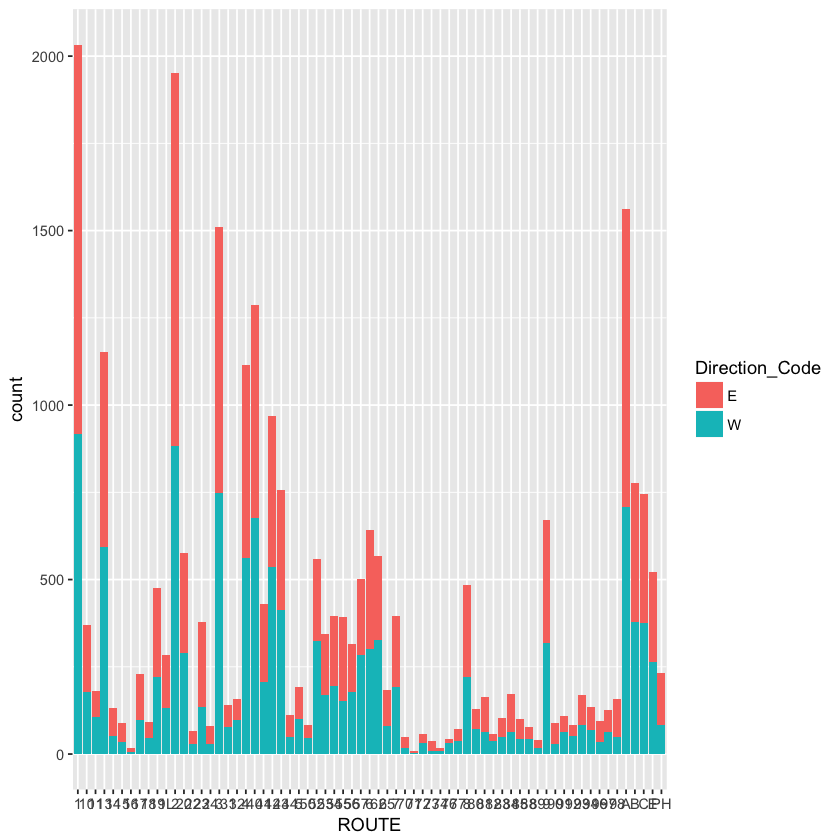

In [18]:
ggplot(tb, aes(x=ROUTE, fill=Direction_Code)) + geom_bar()

## Home Place Geocoded Bar Chart

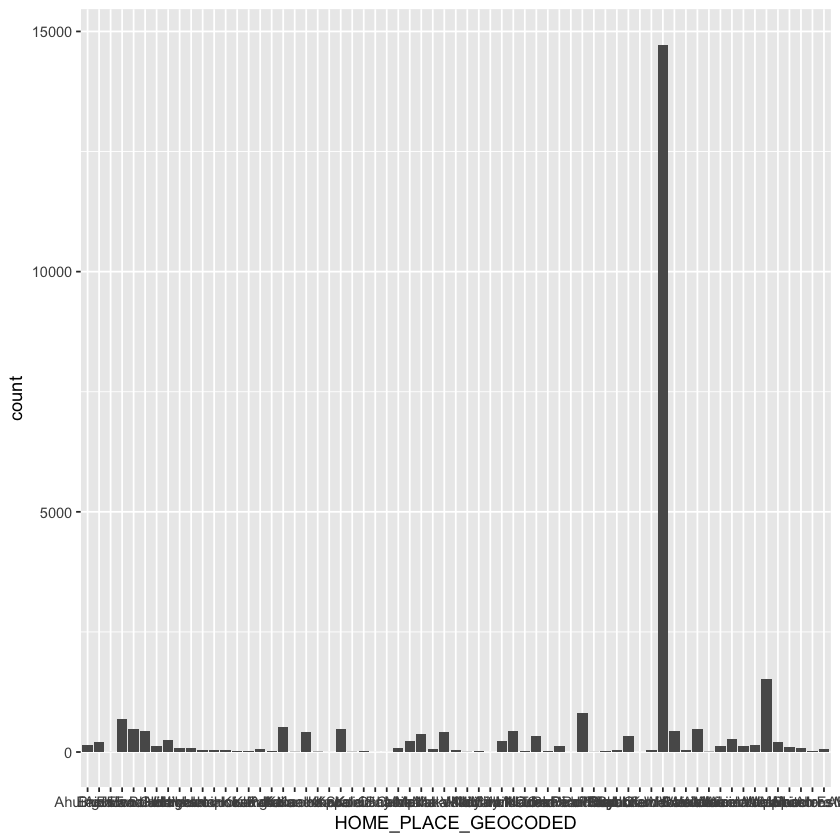

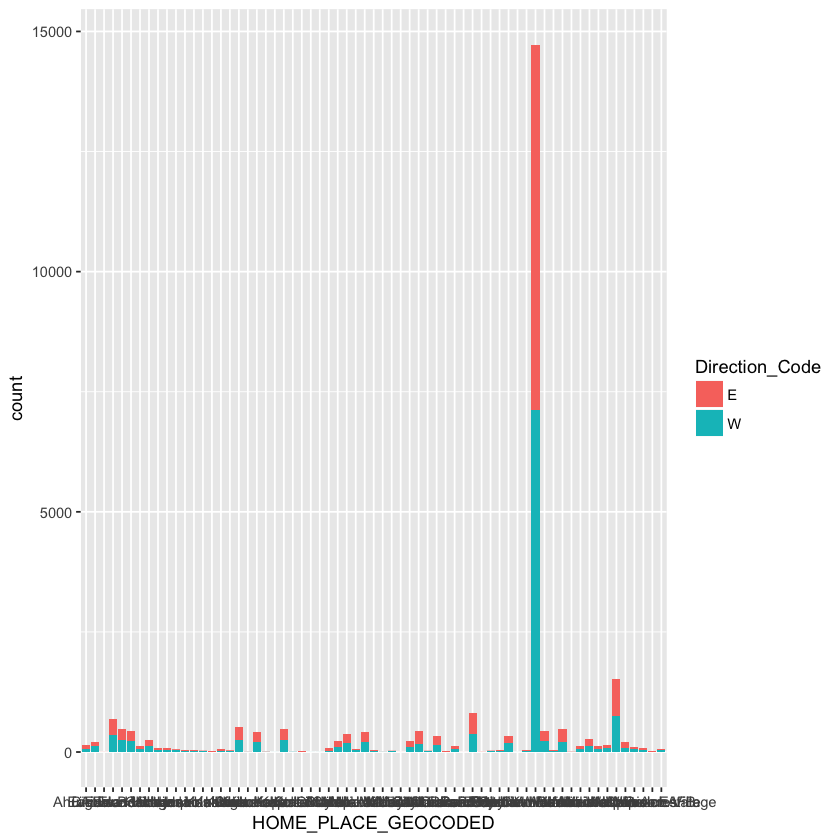

In [21]:
ggplot(tb, aes(x=HOME_PLACE_GEOCODED)) + geom_bar()
ggplot(tb, aes(x=HOME_PLACE_GEOCODED, fill=Direction_Code)) + geom_bar()

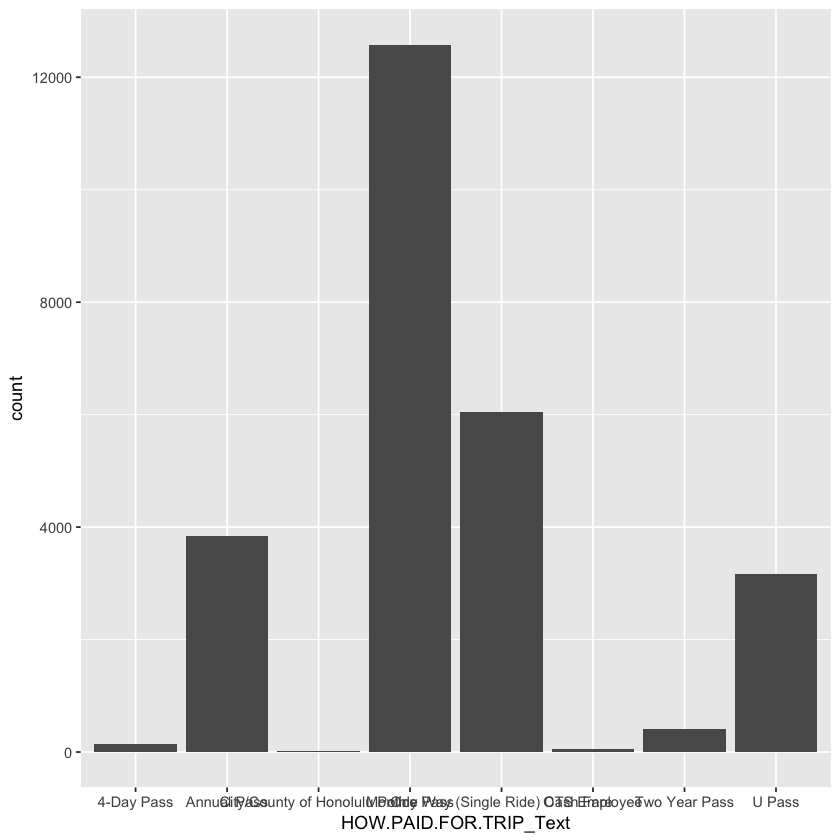

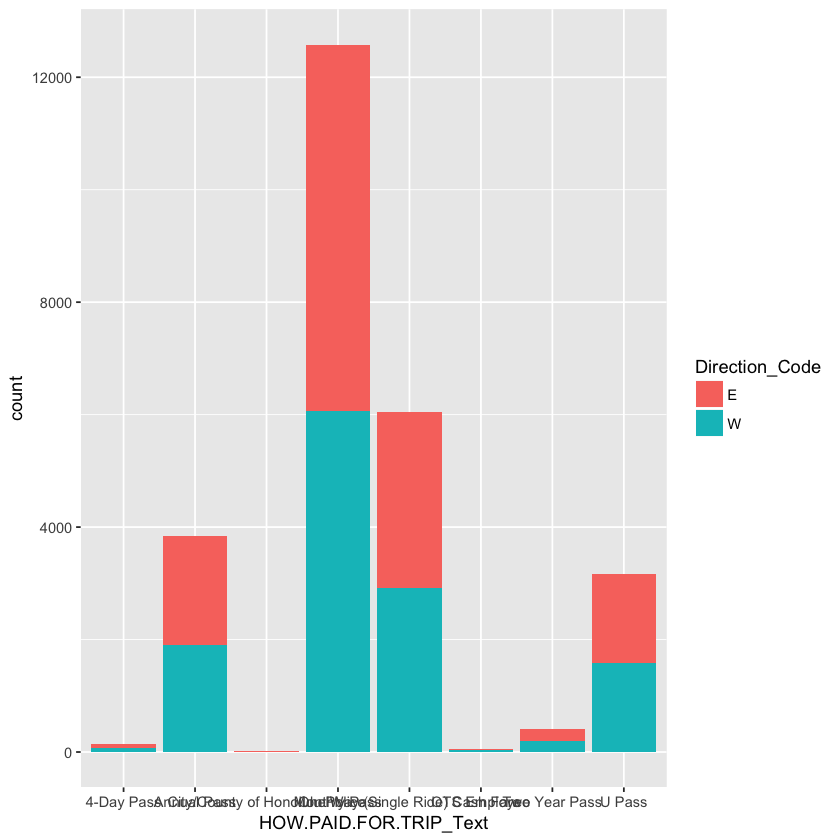

In [19]:
## Route Bar Chart
ggplot(tb, aes(x=HOW.PAID.FOR.TRIP_Text, fill=Direction_Code)) + geom_bar()

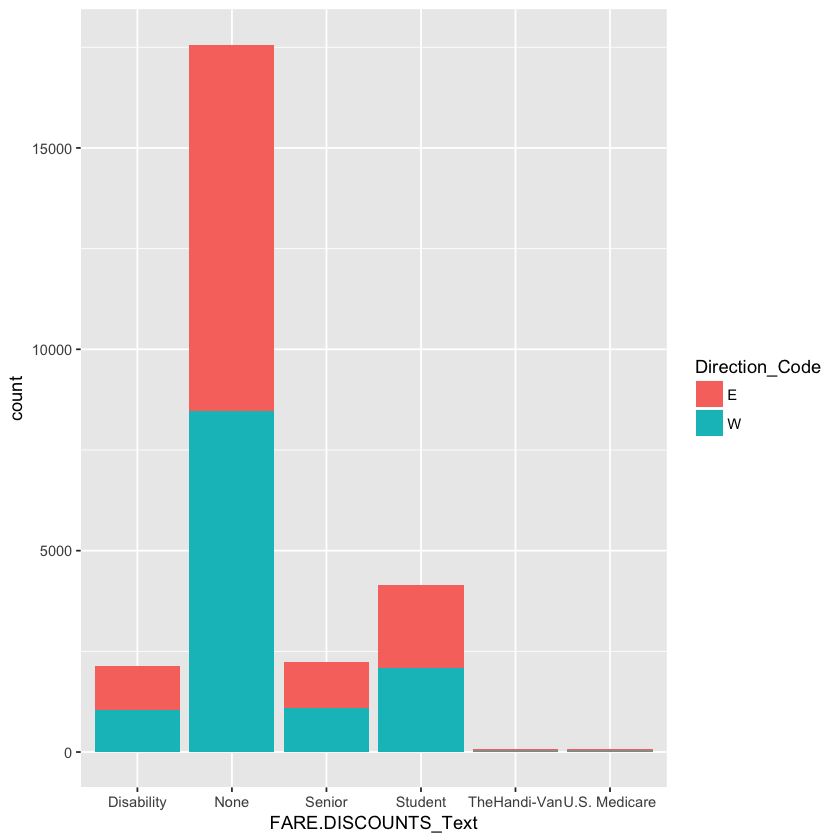

In [20]:
ggplot(tb, aes(x=FARE.DISCOUNTS_Text, fill=Direction_Code)) + geom_bar()

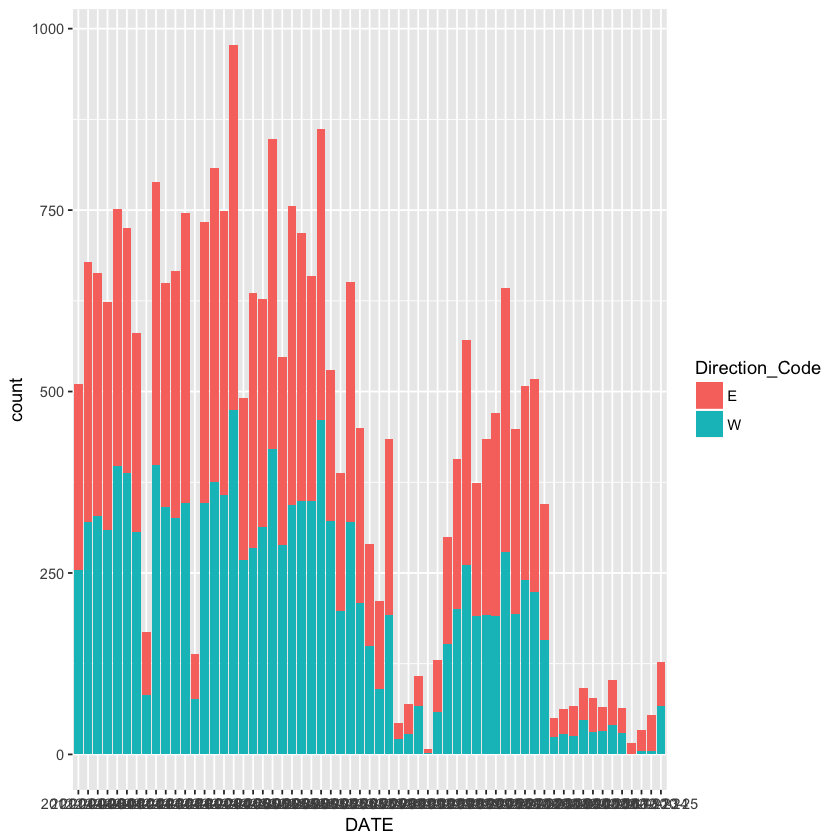

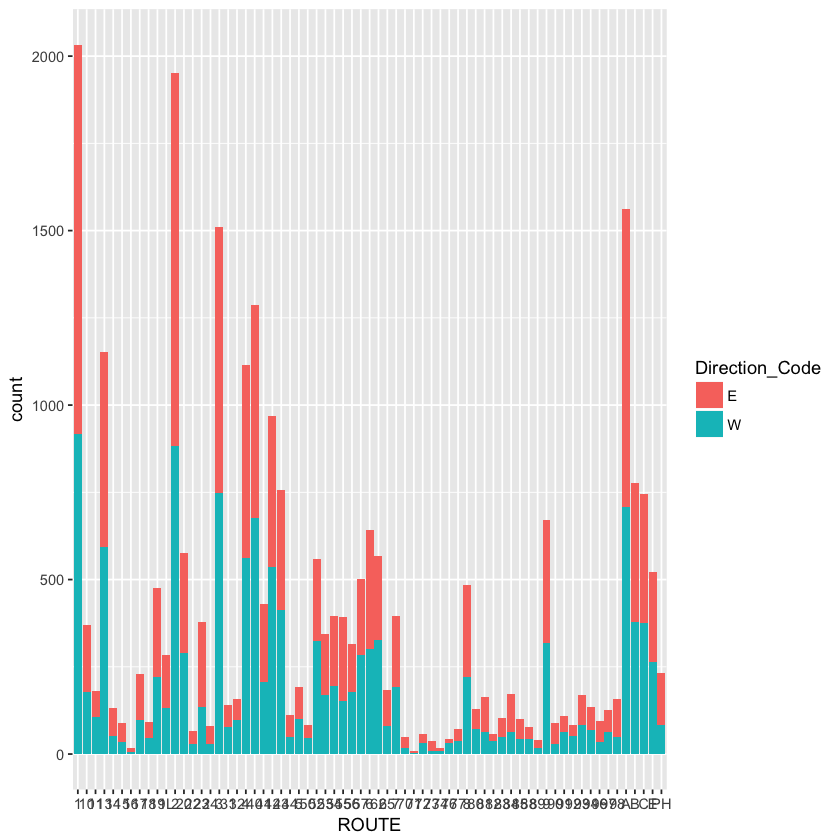

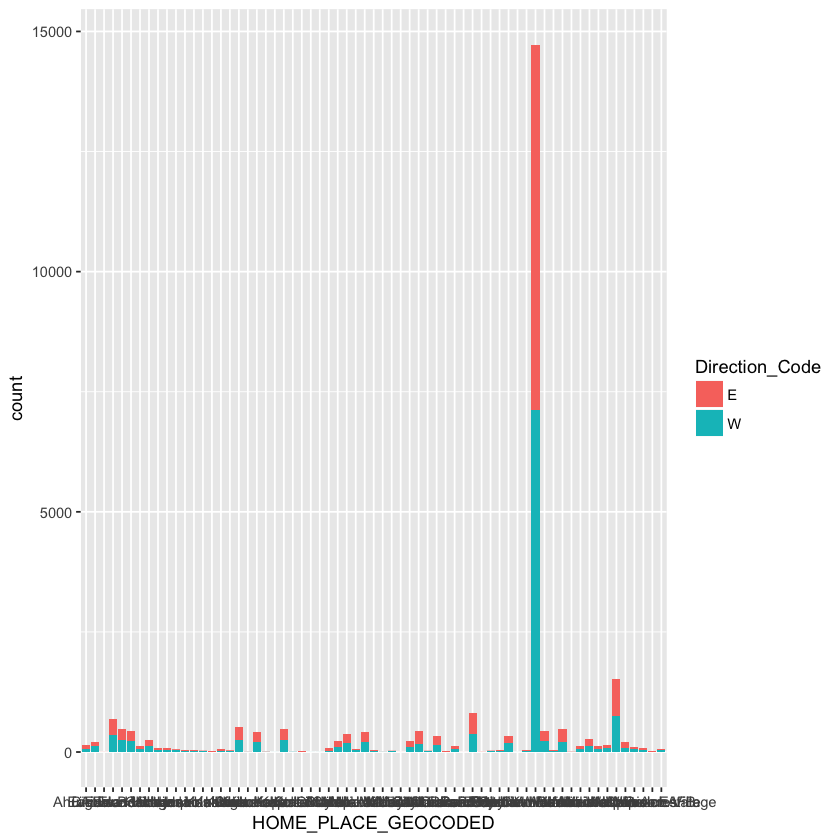

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


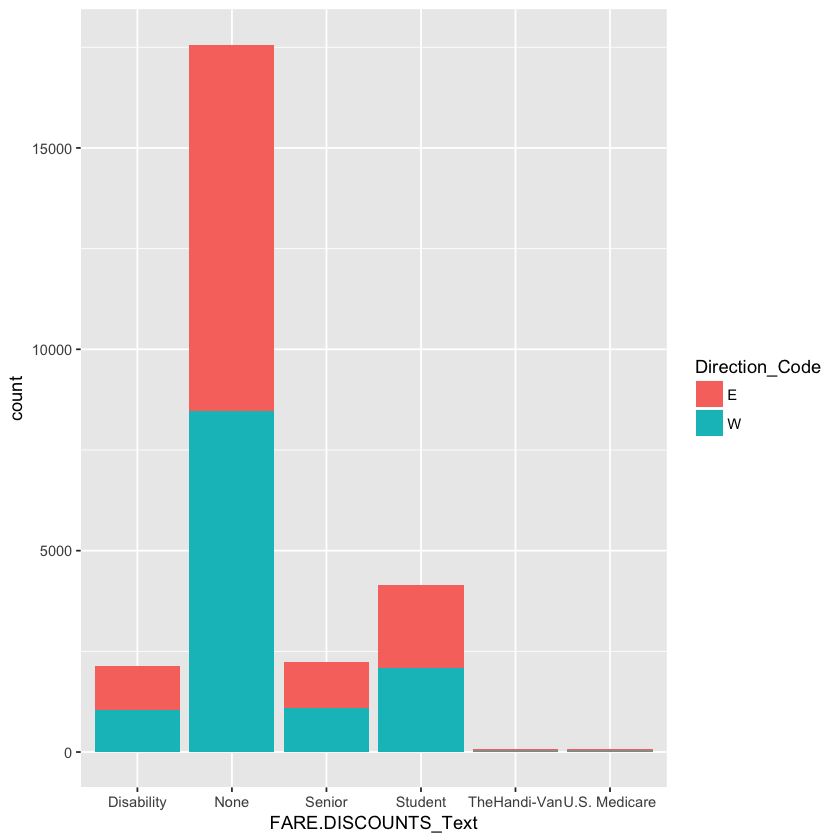

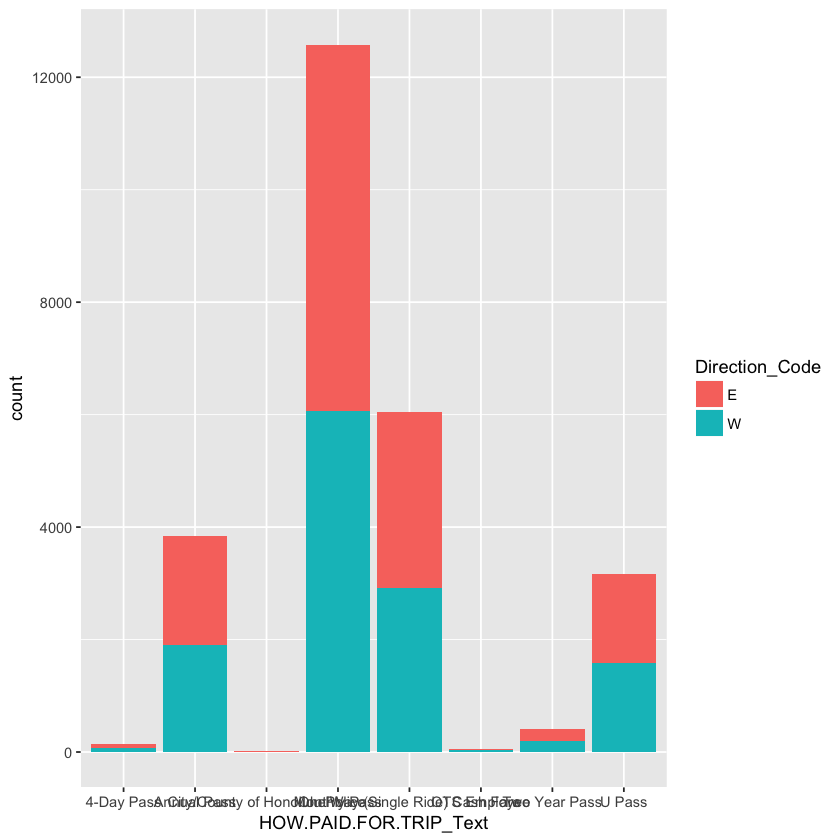

In [50]:
    #ggplot(tb, aes(x = reorder(varname, -table(varname)[varname]), fill=Direction_Code)) + geom_bar()


ew_plot = function(p1) {
    ggplot(tb, aes_string(x = p1, fill='Direction_Code')) + geom_bar()
}

hart_vars = c('DATE', 'ROUTE','HOME_PLACE_GEOCODED' ,'FARE.DISCOUNTS_Text', 'HOW.PAID.FOR.TRIP_Text')

lapply(hart_vars, ew_plot)





In [32]:
factors(tb %>% select(FARE.DISCOUNTS_Text, HOW.PAID.FOR.TRIP_Text))

ERROR: Error in factors(tb %>% select(FARE.DISCOUNTS_Text, HOW.PAID.FOR.TRIP_Text)): could not find function "factors"


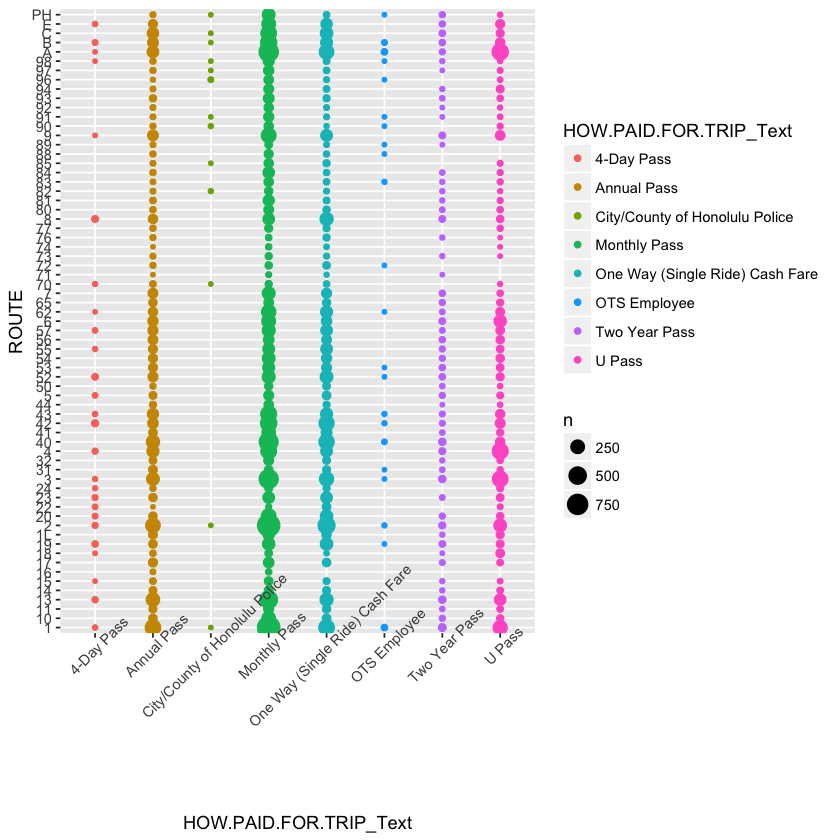

In [20]:
ggplot(tb, aes(x=HOW.PAID.FOR.TRIP_Text, y=ROUTE, color=HOW.PAID.FOR.TRIP_Text)) + geom_count() + theme(axis.text.x=element_text(angle=45))

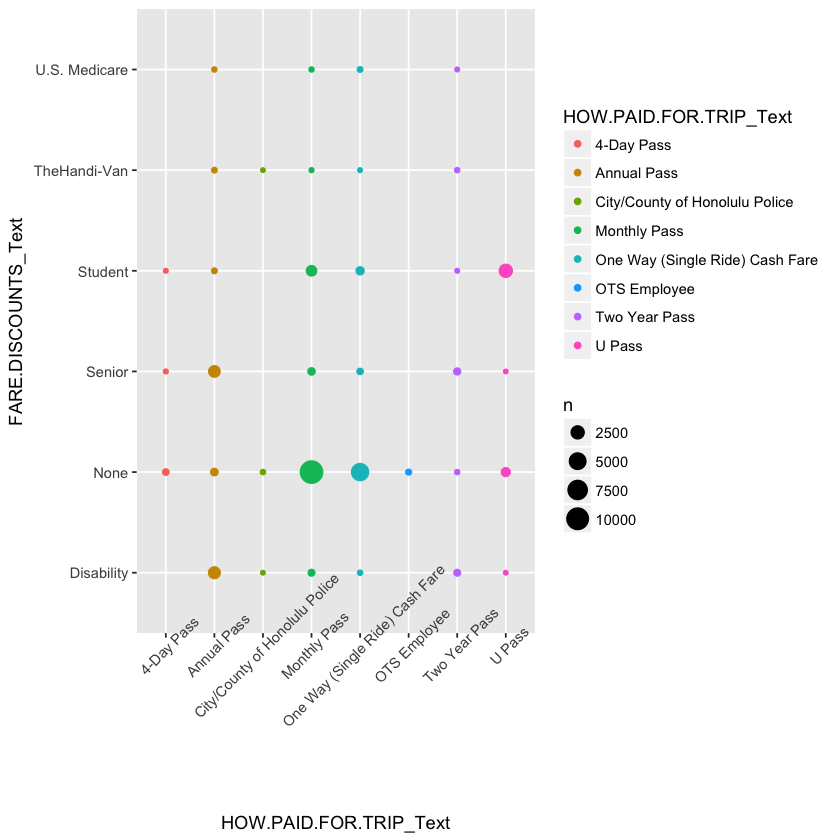

In [21]:
ggplot(tb, aes(x=HOW.PAID.FOR.TRIP_Text, y=FARE.DISCOUNTS_Text, color=HOW.PAID.FOR.TRIP_Text)) + geom_count() + theme(axis.text.x=element_text(angle=45))